# Computer Vision - P2

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 24th, 23:00 h** 

In [26]:
from skimage import io, transform
from matplotlib import pyplot as plt
import numpy as np
from skimage.exposure import histogram
from skimage import img_as_float
from skimage.color import rgb2gray
from scipy.ndimage import convolve
from skimage.transform import rescale

In [27]:
%matplotlib inline

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

(1024, 768, 3)
uint8


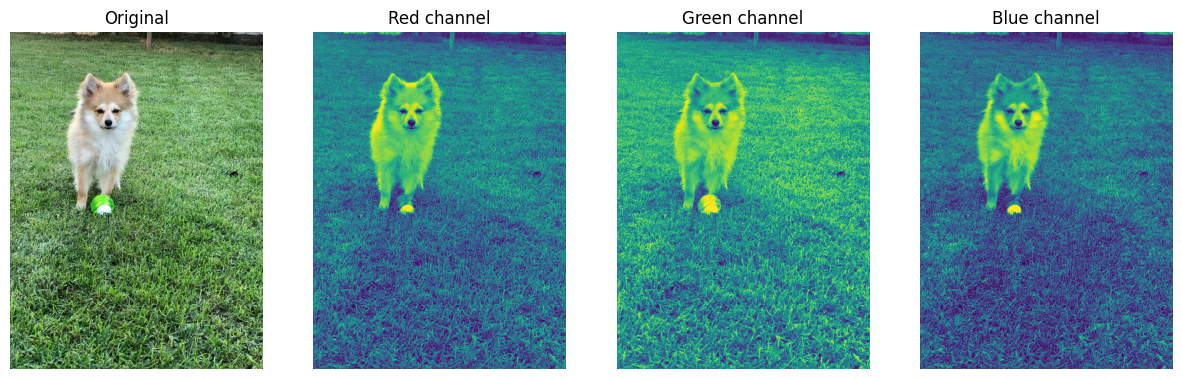

In [28]:
# Read the image './images_notebook/rocki.jpeg' into the variable 'img' using the function io.imread().
img = io.imread('./images_notebook/rocki.jpeg')
#visualize the image using the function plt.imshow() as well as each of its channels separately (R, G, and B) in the same plot.
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

ax = axs[0]
ax.imshow(img)
ax.axis('off')
ax.set_title('Original')

ax = axs[1]
ax.imshow(img[:,:,0])
ax.axis('off')
ax.set_title('Red channel')

ax = axs[2]
ax.imshow(img[:,:,1])
ax.axis('off')
ax.set_title('Green channel')

ax = axs[3]
ax.imshow(img[:,:,2])
ax.axis('off')
ax.set_title('Blue channel')


# Print the image size and the data type
print(img.shape)
print(img.dtype)


b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

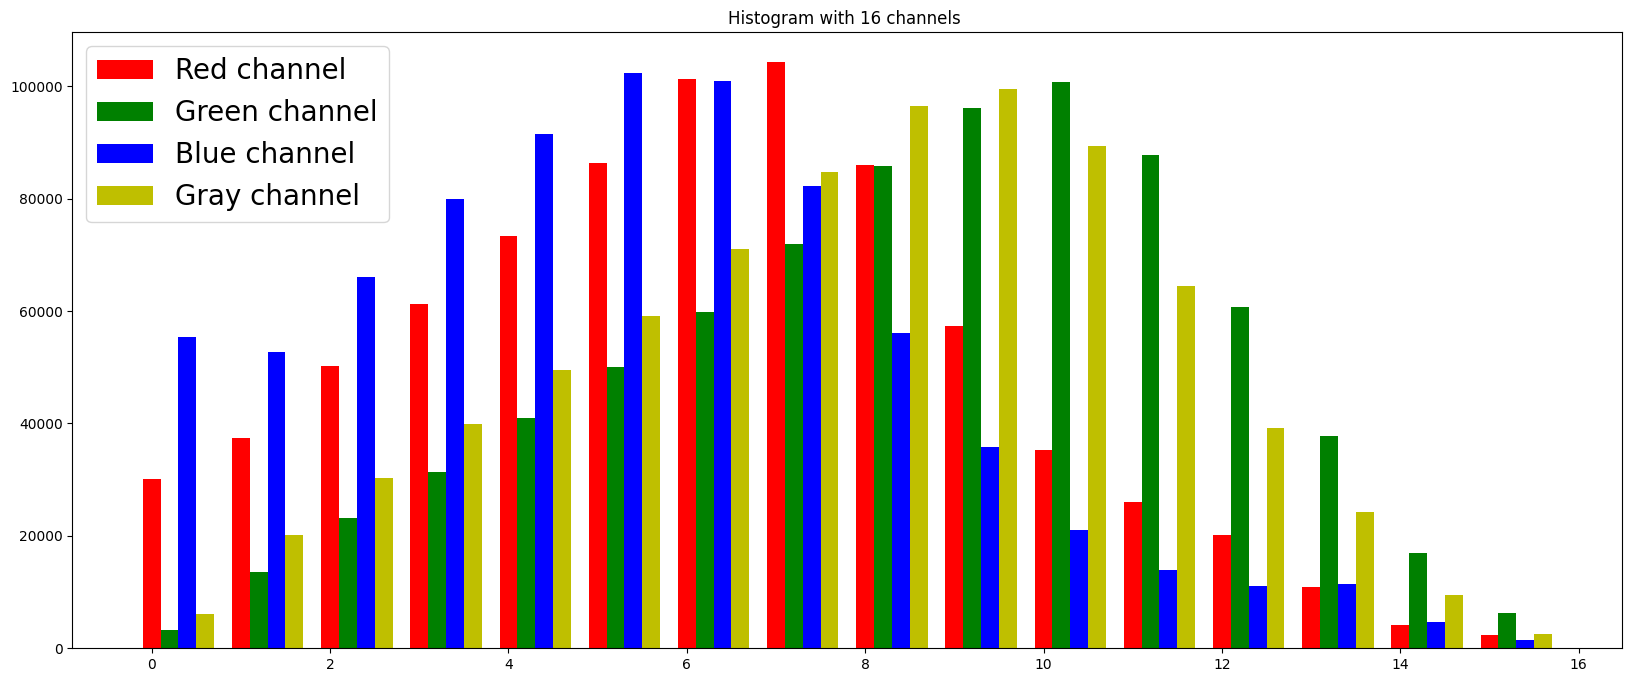

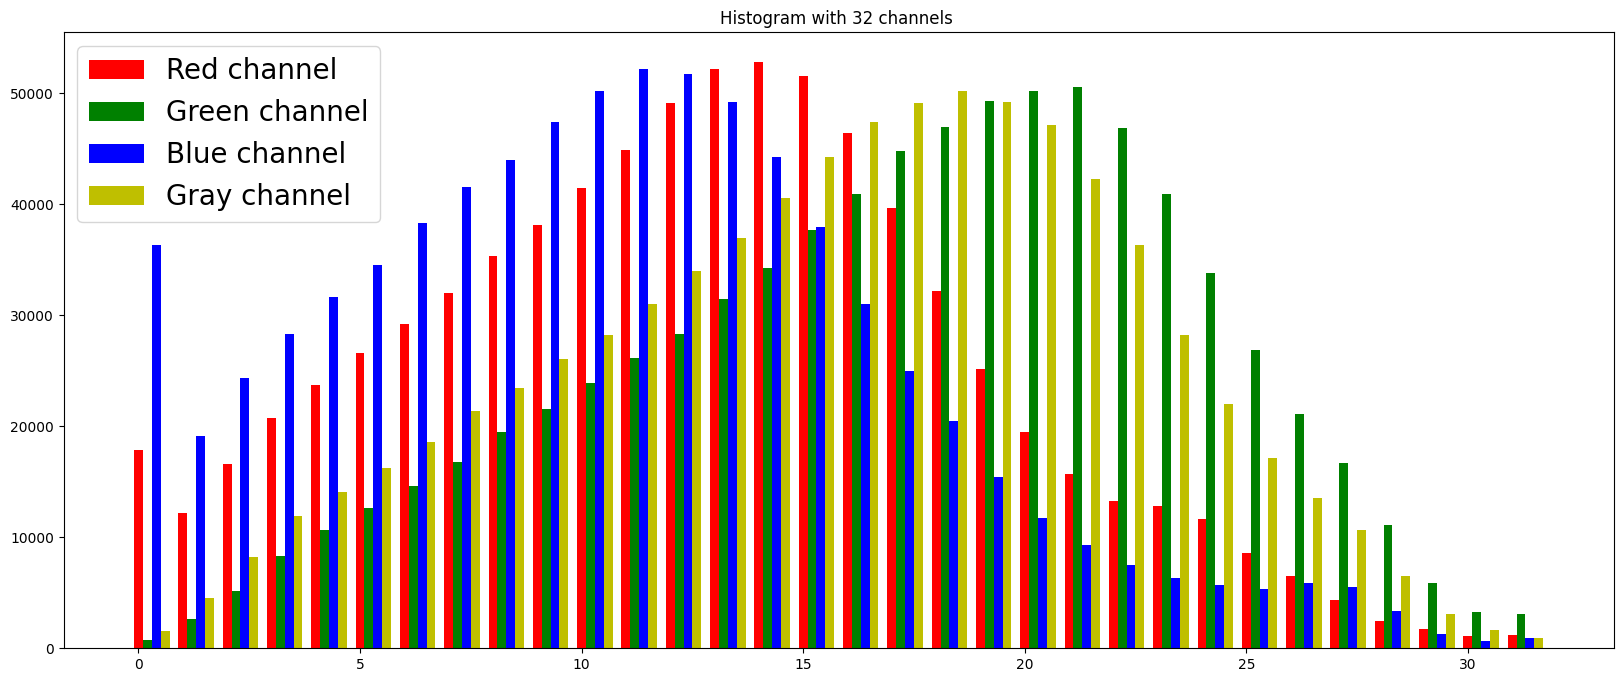

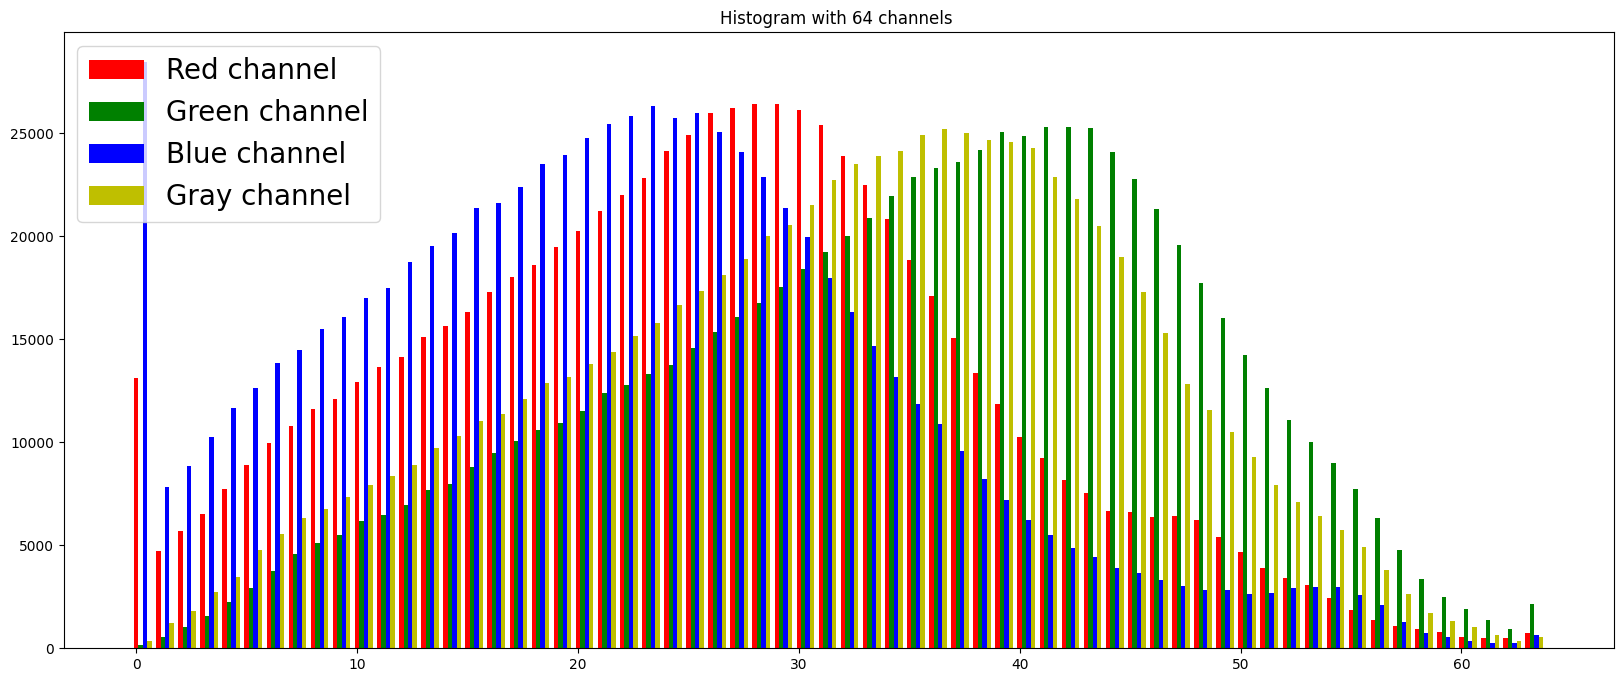

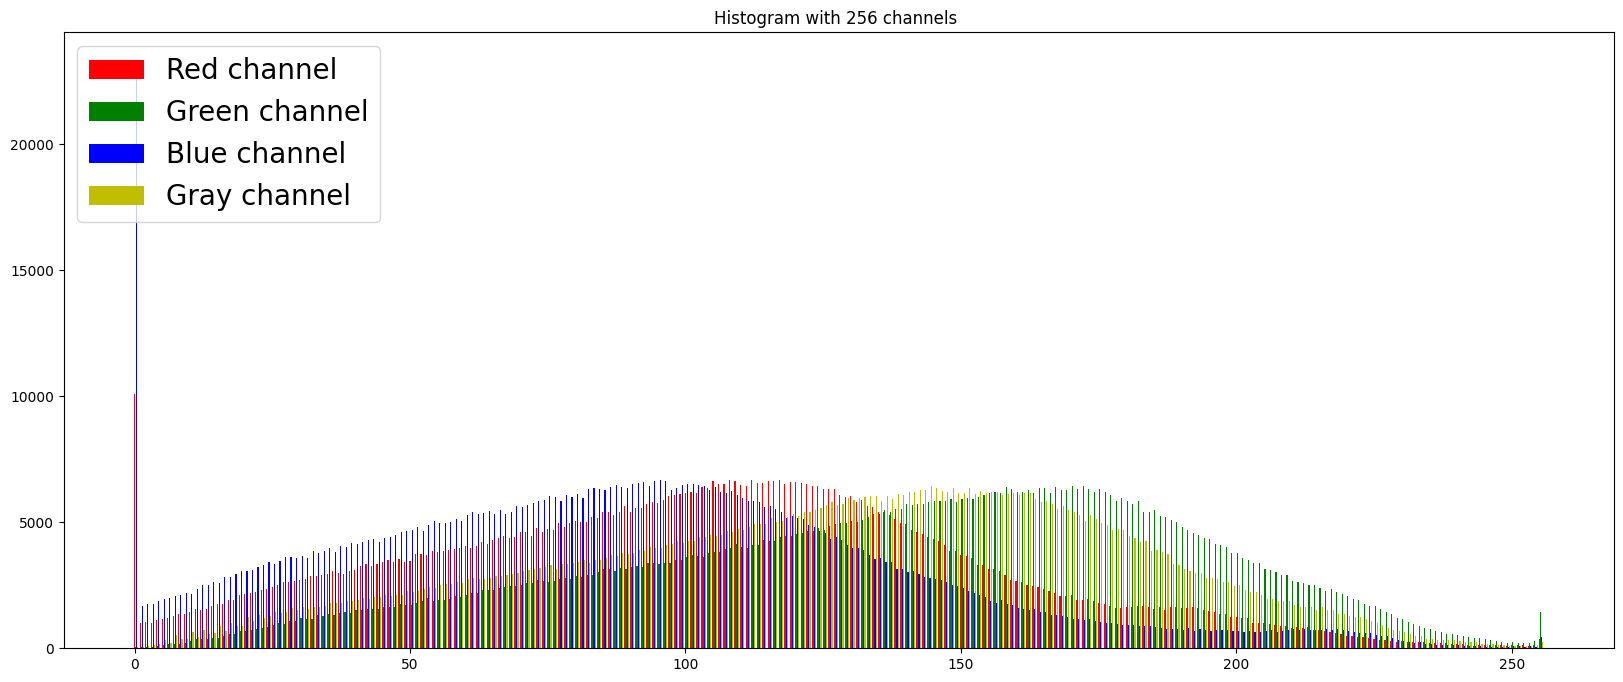

In [29]:
# What is the histogram representing?
    # A histogram represents the distribution of pixel intensity values in an image providing insights into brightness, contrast,
    # and the prevalence of specific intensity levels.
# What are the bins representing?
    # Bins represent the ranges of the pixel intensity value in the image
# What type should be the image in order to compute the histogram?
    # Histogram can be computed for RGB and Grayscale images and these can be of tyoe uint(more efficient) or float(precise resutls)

#create the function im_hist(im, nbins=8) to visualize the histogram of the three channels of rgb and the grayscale of an image
def im_hist(im, nbins=8):
    """
    Creates a single bar graph with the values of the RGB and grayscale channels of an image.
    
    Parameters:
        im (numpy.ndarray): The input image.
        nbins (int): Number of bins for the histogram (default is 8).
    """

    # Create a combined bar graph
    x = np.arange(nbins)
    width = 0.2
    #for RGB images
    if len(im.shape) == 3 and im.shape[2] == 3:  # RGB image
        r_hist, r_bins = histogram(img_as_float(im[:,:,0]), nbins=nbins)
        g_hist, g_bins = histogram(img_as_float(im[:,:,1]), nbins=nbins)
        b_hist, b_bins = histogram(img_as_float(im[:,:,2]), nbins=nbins)
        
        # Grayscale image
        gray=rgb2gray(im)
        gray_hist, gray_bins = histogram(img_as_float(gray), nbins=nbins)

        
        plt.figure(figsize=(20, 8))
        r_plt = plt.bar(x, r_hist, width, color='r')
        g_plt = plt.bar(x + width, g_hist, width, color='g')
        b_plt = plt.bar(x + 2*width, b_hist, width, color='b')
        gray_plt = plt.bar(x + 3*width, gray_hist, width, color='y')
        
        plt.title(f'Histogram with {nbins} channels ')
        plt.legend((r_plt[0], g_plt[0], b_plt[0], gray_plt[0]), ('Red channel','Green channel','Blue channel', 'Gray channel'), loc=2, prop={'size': 20})
        plt.show()
    # For grayscale images 
    else:
        gray_hist, gray_bins = histogram(img_as_float(im), nbins=nbins)
        plt.figure(figsize=(18,5))
        plt.bar(x, gray_hist, width)
        plt.show()

# execute the method im_hist() with the image 'rocki.jpeg' as input and nbins as 8, 16, 32, 64, 256
im_hist(img, 16)
im_hist(img, 32)
im_hist(img, 64)
im_hist(img, 256)

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


### Answers to questions

- Is the type of the mask important for the convolution?
    - `Yes, the type of mask for the convolution is important because it determines the pattern and direction of enhancement or filtering applied to the image.`
- What effect does each of the masks produce on the original image?
   - `Mask_h1d: The horizontal mask emphasizes the horizontal edges and gradients in the image hence we see the image pixels as if in horizontal direction. `
   - `Mask_v1d: The vertical mask emphasizes the vertical edges and gradients in the image hence we see the image pixels as if in vertical direction. `
   - `Mask_2d:  The 2d mask gives equal wtight to pixels of all directions and creates a blurred effect.`

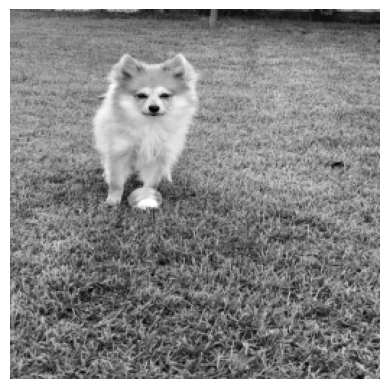

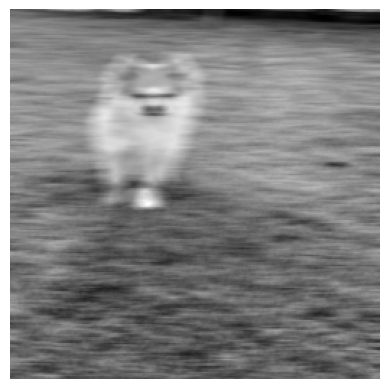

Horizontal mask
---------------
Min: 0.09206013071895425
Max: 0.9569849150326797
Data Type: float64




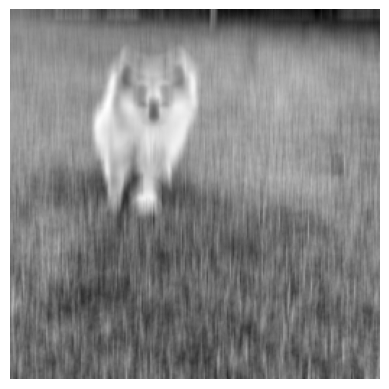

Vertical mask
-------------
Min: 0.08533364705882354
Max: 0.9248311895424838
Data Type: float64




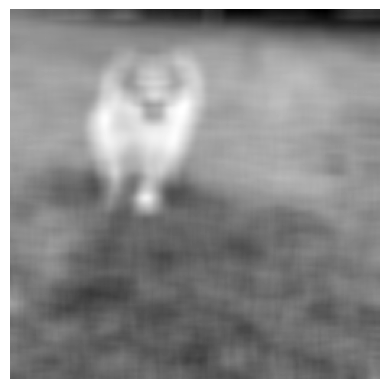

2D mask
-------
Min: 0.13503060566448793
Max: 0.851176205664488
Data Type: float64


In [30]:
import matplotlib.image as mpimg
from skimage.transform import resize
from skimage import img_as_ubyte

rocki_img = io.imread('./images_notebook/rocki.jpeg')
#Reshape the image
resized=resize(rocki_img,(256,256))
resized_b = img_as_ubyte(resized) 

#Convert to grayscale
rocki_gray = rgb2gray(resized_b)

plt.imshow(rocki_gray, cmap = 'gray')
plt.axis('off')
plt.show()

#1. Apply a horizontal mask mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]] using the function 'ndimage.convolve()' from spicy and show the maximum and the maximum values as well as the data type of the image
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# Normalize mask
mask_h1d=mask_h1d/np.sum(mask_h1d)
rocki_h1d = convolve(rocki_gray, mask_h1d)

plt.imshow(rocki_h1d, cmap = 'gray')
plt.axis('off')
plt.show()

print("Horizontal mask")
print("---------------")
print('Min:', rocki_h1d.min())
print('Max:', rocki_h1d.max())
print('Data Type:', rocki_h1d.dtype)
print("")
print("========================================")
print("")

#2. Apply a transpose of the horizontal mask
mask_v1d = mask_h1d.transpose()
# Normalize mask
mask_v1d=mask_v1d/np.sum(mask_h1d)
rocki_v1d = convolve(rocki_gray, mask_v1d)

plt.imshow(rocki_v1d, cmap = 'gray')
plt.axis('off')
plt.show()


print("Vertical mask")
print("-------------")
print('Min:', rocki_v1d.min())
print('Max:', rocki_v1d.max())
print('Data Type:', rocki_v1d.dtype)
print("")
print("========================================")
print("")

#3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.
mask_2d = np.ones((15, 15))
# Normalize mask
mask_2d=mask_2d/np.sum(mask_2d)
rocki_2d = convolve(rocki_gray, mask_2d)


plt.imshow(rocki_2d, cmap = 'gray')
plt.axis('off')
plt.show()

print("2D mask")
print("-------")
print('Min:', rocki_2d.min())
print('Max:', rocki_2d.max())
print('Data Type:', rocki_2d.dtype)

b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


Text(0.5, 1.0, 'Uniformly convolved')

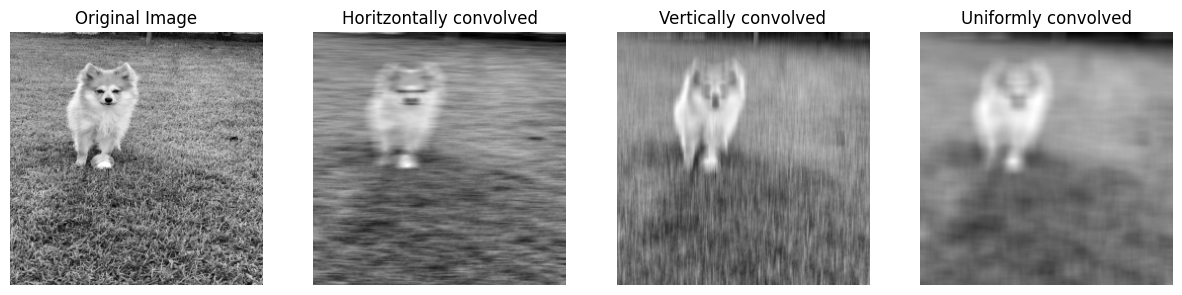

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

ax = axs[0]
ax.imshow(rocki_gray, cmap = 'gray')
ax.axis('off')
ax.set_title('Original Image')

ax = axs[1]
ax.imshow(rocki_h1d, cmap = 'gray')
ax.axis('off')
ax.set_title('Horitzontally convolved')

ax = axs[2]
ax.imshow(rocki_v1d, cmap = 'gray')
ax.axis('off')
ax.set_title('Vertically convolved')

ax = axs[3]
ax.imshow(rocki_2d, cmap = 'gray')
ax.axis('off')
ax.set_title('Uniformly convolved')


c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.




### Answer to question
- Can we convolve a color (RGB) image? 
    - `Yes, we can convolve a color(RGB) image but we need to apply the convolution separately for each image channel.`

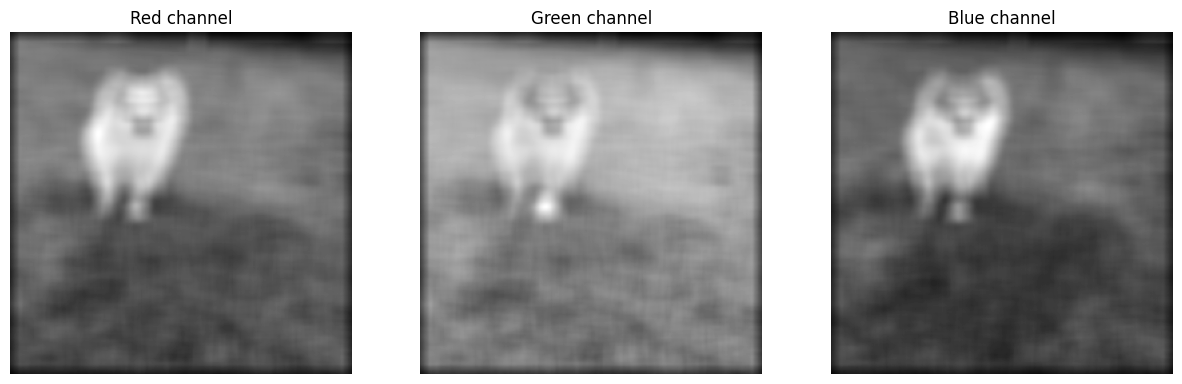

In [32]:
def conv_coor(image, mask):

    red_cnl = image[:, :, 0]
    green_cnl = image[:, :, 1]
    blue_cnl = image[:, :, 2]

    red_conv= convolve(red_cnl, mask, mode='constant', cval=0.0)
    green_conv= convolve(green_cnl, mask, mode='constant', cval=0.0)
    blue_conv= convolve(blue_cnl, mask, mode='constant', cval=0.0)


    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

    ax = axs[0]
    ax.imshow(red_conv, cmap='gray')
    ax.axis('off')
    ax.set_title('Red channel')

    ax = axs[1]
    ax.imshow(green_conv, cmap='gray')
    ax.axis('off')
    ax.set_title('Green channel')

    ax = axs[2]
    ax.imshow(blue_conv, cmap='gray')
    ax.axis('off')
    ax.set_title('Blue channel')

# Apply the function
rocki_image = io.imread('./images_notebook/rocki.jpeg')
#resize the image to 256x256
rocki_image=resize(rocki_image,(256,256))

mask_15 = np.ones((15, 15))
mask_15 = mask_15/np.sum(mask_15)
conv_coor(rocki_image, mask_15)

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

Is there any difference? Please, comment what happens and why.


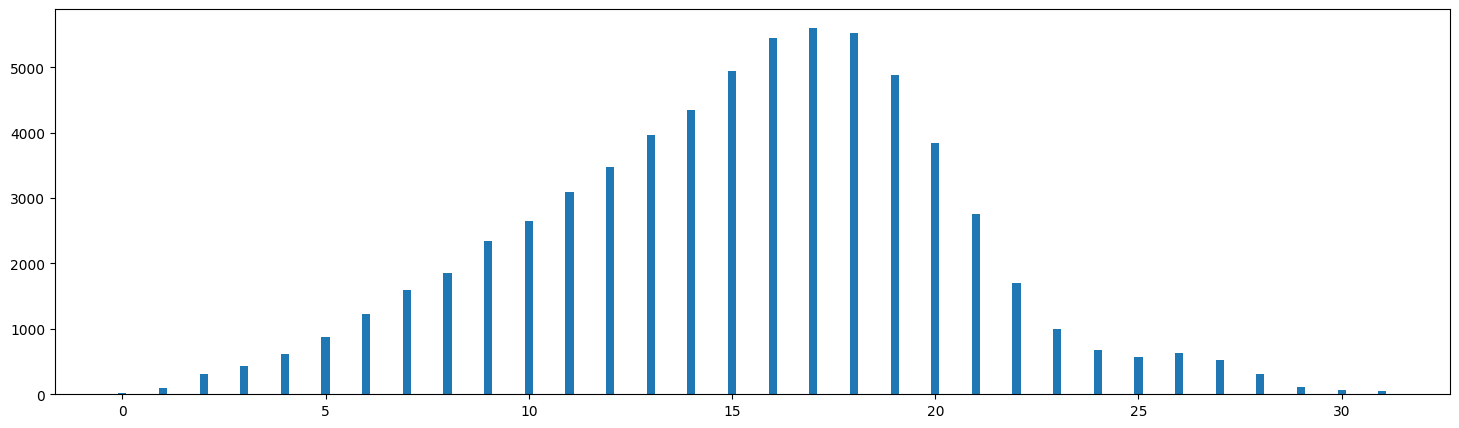

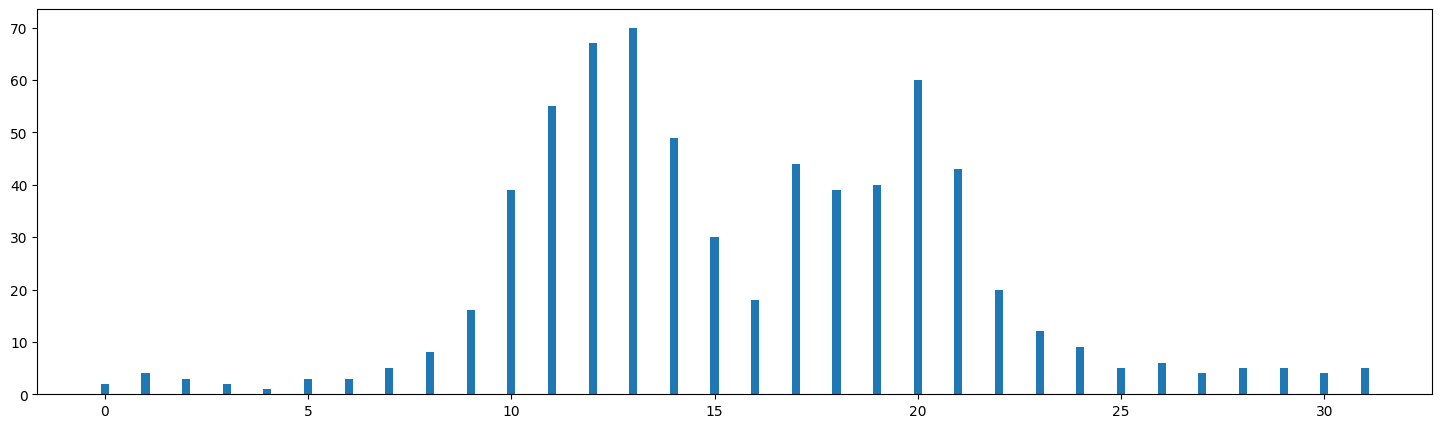

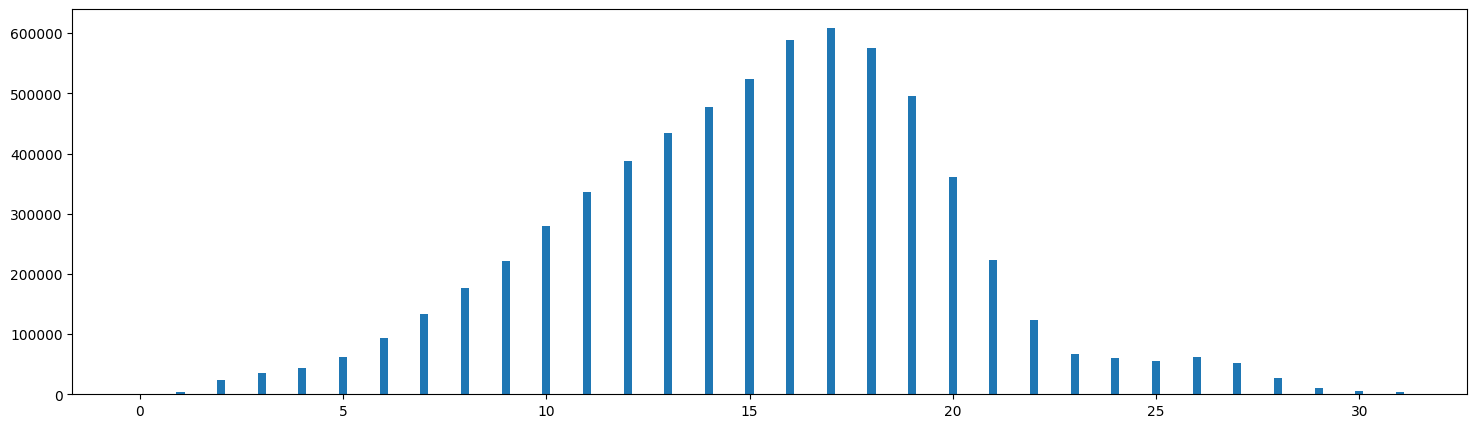

In [33]:
# ANSWER
# Yes, definately there are diferrenes when we reduce or augment the image by 10 times. When we reduce the image, it will have less pixels by a factor of 10 and hence it will be
# less detailed and smooth. Wheb we augment, the image size increases the so the number of pixels do which increases details in the image.

# The histograms reflect these changes in the represented bins. The reduced histogram has changed a lot and the beans represent that the image has much less details. However,
# the augmented histogram in this case maintains the same shape.
    

rocki_reduced=rescale(rocki_gray,0.1, anti_aliasing=True)
rocki_augmented= rescale(rocki_gray, 10, anti_aliasing=True)
nbins = 32
# Visualize original 
im_hist(rocki_gray, nbins)
#Visualize reduced histogram
im_hist(rocki_reduced, nbins)
#Visualize augmented histogram
im_hist(rocki_augmented, nbins)


b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.

([], [])

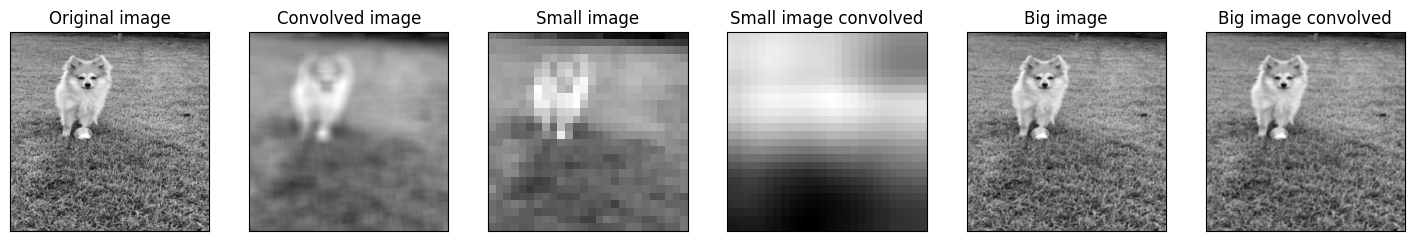

In [34]:
# ANSWER
# The bigger the image is, the more noticeable the effect of the convolution is. This is because the bigger the image is, the more pixels it has and hence the more details it has.

rocki_convolved = convolve(rocki_gray, np.ones((15, 15)))
rocki_small_convolved = convolve(rocki_reduced, np.ones((15, 15)))
rocki_big_convolved = convolve(rocki_augmented, np.ones((15, 15)))

fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,6,1)
plt.imshow(rocki_gray, cmap='gray')
plt.title('Original image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,6,2)
plt.imshow(rocki_convolved, cmap='gray')
plt.title('Convolved image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,6,3)
plt.imshow(rocki_reduced, cmap='gray')
plt.title('Small image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,6,4)
plt.imshow(rocki_small_convolved, cmap='gray')
plt.title('Small image convolved')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,6,5)
plt.imshow(rocki_augmented, cmap='gray')
plt.title('Big image')
plt.xticks([])
plt.yticks([])

fig.add_subplot(1,6,6)
plt.imshow(rocki_big_convolved, cmap='gray')
plt.title('Big image convolved')
plt.xticks([])
plt.yticks([])

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

Text(0.5, 1.0, 'Median filter')

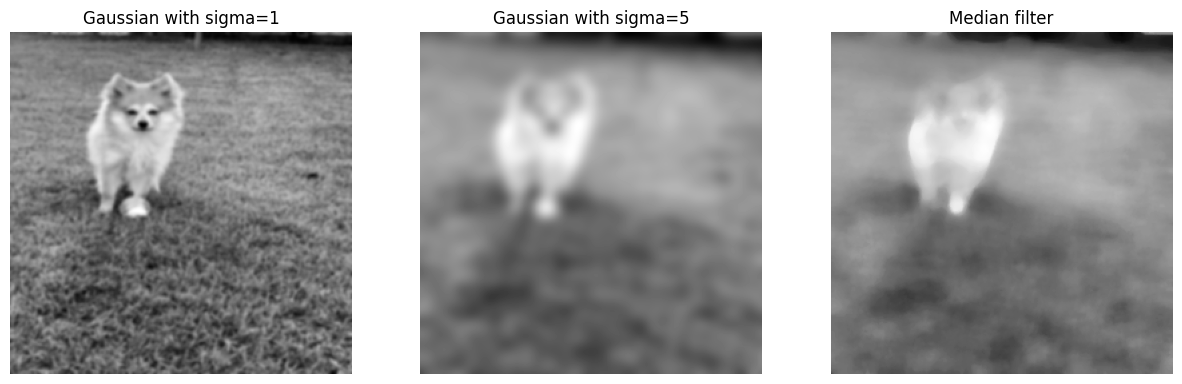

In [35]:
# ANSWER
# The difference of using different kinds of filters on the original image is that the image will be smoothed in different ways. The Gaussian filter will smooth the image
# by convolving the image with a Gaussian kernel. The median filter will smooth the image by replacing each pixel's value with the median of its neighboring pixels.
# Using a Gaussian filter with a high alpha will result in significant smoothing, which os appropriate for reducing noise or preparing the image for further processing.
# On the other hand, a median filter will help removing salt-and-pepper noise without overly blurring the image. The choice between filters depends on the specific 
# application and the desired result.

from skimage.filters import gaussian
from skimage.filters import median
from skimage.morphology import disk

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#Gaussian kernel with sigma = 1
rocki_gray_gs1 = gaussian(rocki_gray, sigma=1)
ax = axs[0]
ax.imshow( rocki_gray_gs1, cmap='gray')
ax.axis('off')
ax.set_title("Gaussian with sigma=1")

#Gaussian kernel with sigma != 1
rocki_gray_gs5 = gaussian(rocki_gray, sigma=5)
ax = axs[1]
ax.imshow( rocki_gray_gs5, cmap='gray')
ax.axis('off')
ax.set_title("Gaussian with sigma=5")

#Median filter
rocki_gray_mf = median(rocki_gray, disk(10))
ax = axs[2]
ax.imshow(rocki_gray_mf, cmap='gray')
ax.axis('off')
ax.set_title("Median filter")

b) **(Optional)** Apply the smoothing on some other images and present their results.

Text(0.5, 1.0, 'Median filter')

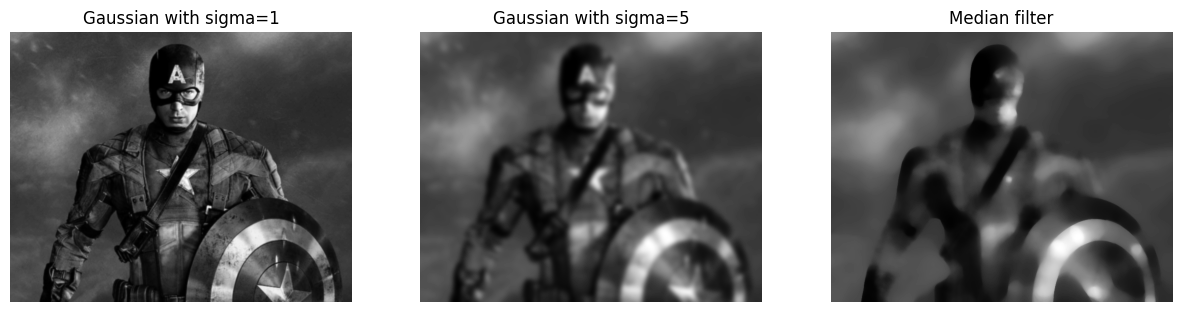

In [36]:
#your solution

# Applying smoothing in Capitain America's image.

cp_america = io.imread('./images_notebook/Capitain_America.jpg')
cp_america_gray = rgb2gray(cp_america)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

#Gaussian kernel with sigma = 1
cp_america_gray_gs1 = gaussian(cp_america_gray, sigma=1)
ax = axs[0]
ax.imshow(cp_america_gray_gs1, cmap='gray')
ax.axis('off')
ax.set_title("Gaussian with sigma=1")

#Gaussian kernel with sigma != 1
cp_america_gray_gs5 = gaussian(cp_america_gray, sigma=5)
ax = axs[1]
ax.imshow(cp_america_gray_gs5, cmap='gray')
ax.axis('off')
ax.set_title("Gaussian with sigma=5")

#Median filter
cp_america_gray_mf = median(cp_america_gray, disk(20))
ax = axs[2]
ax.imshow(cp_america_gray_mf, cmap='gray')
ax.axis('off')
ax.set_title("Median filter")

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best countour detection technique? 

- Which are the optimal parameters for this image? 

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

#### **Answers**

- Which is the best countour detection technique? 
    - `After visualizing the results, we can see that Prewitt and Sobel are quite stable and give quality results although Sobel look a bit better. However, Canny returns a pixels image and not a great result`

- Which are the optimal parameters for this image? 
    - `In this case I didn't add any paramenters but maybe we could`

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing? 

Text(0.5, 1.0, 'Canny')

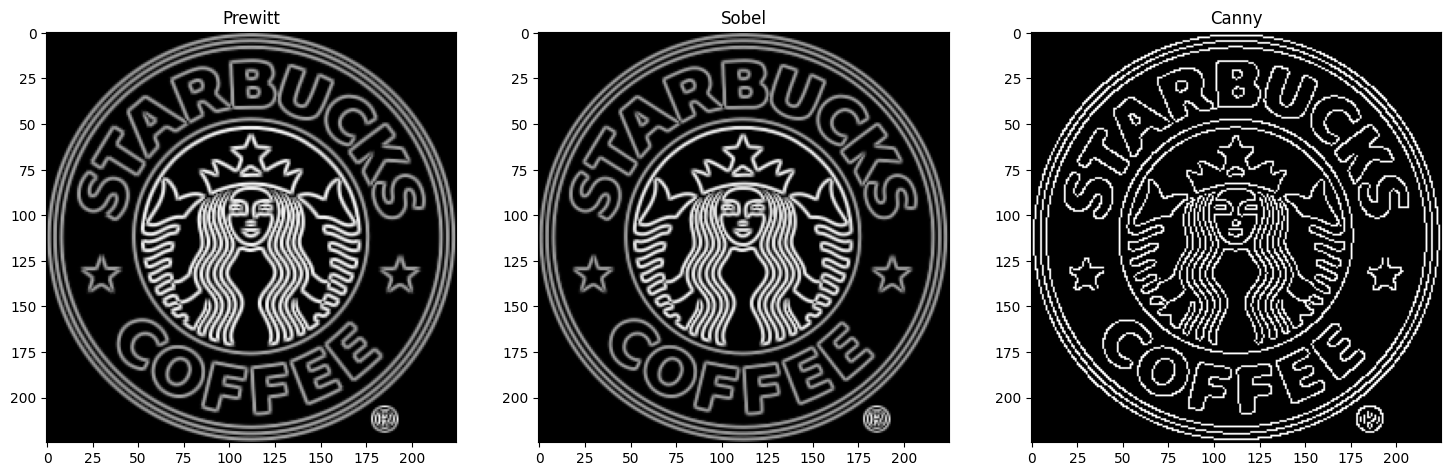

In [37]:
import warnings
warnings.filterwarnings("ignore")
from skimage.feature import canny
from skimage import filters

"""Your Solution"""
logo = io.imread('images_notebook/logo.png')
logo_gray = rgb2gray(logo[:, :, 0:3])
prewitt = filters.prewitt(logo_gray)
sobel = filters.sobel(logo_gray)
canny_ = canny(logo_gray)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,9))

ax = axs[0]
ax.imshow(prewitt, cmap='gray')
ax.set_title('Prewitt')

ax = axs[1]
ax.imshow(sobel, cmap='gray')
ax.set_title('Sobel')

ax = axs[2]
ax.imshow(canny_, cmap='gray')
ax.set_title('Canny')



b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed? 
- Which are the limitations of the different images contour extraction?

### Answers

- Are the contours improved if the image is previously smoothed? 
    - `No, detecting contours after smoothing the image is more difficult because the edges in the blurred image are less visible.`      
- Which are the limitations of the different images contour extraction?
    - `The limitations of the different images contour extraction are that the contours are not always detected correctly. For example, in the case of the image of the dog, the contours of the dog's ears are not detected correctly.`

Text(0.5, 1.0, 'Canny')

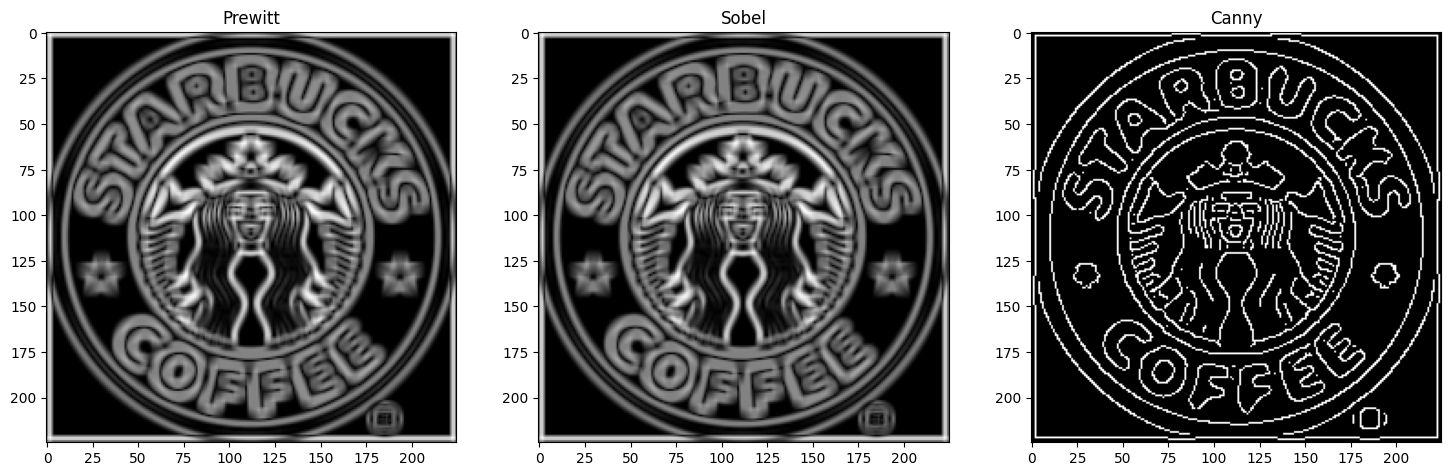

In [38]:
#your solution

from skimage.feature import canny
mask_15=np.ones((7,7))
# normalize the mask
mask_15=mask_15/np.sum(mask_15)
smoothed_logo = convolve(logo_gray, mask_15, mode='constant', cval=0)

prewitt_sm = filters.prewitt(smoothed_logo)
sobel_sm = filters.sobel(smoothed_logo)
canny_sm = canny(smoothed_logo)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18,9))

ax = axs[0]
ax.imshow(prewitt_sm, cmap='gray')
ax.set_title('Prewitt')

ax = axs[1]
ax.imshow(sobel_sm, cmap='gray')
ax.set_title('Sobel')

ax = axs[2]
ax.imshow(canny_sm, cmap='gray')
ax.set_title('Canny')

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


Text(0.5, 1.0, 'Wrap')

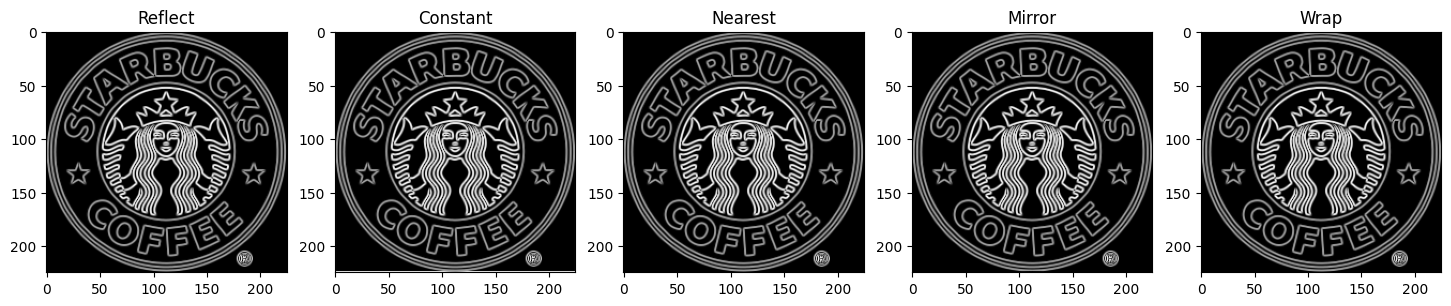

In [39]:
# ANSWER
# There are 5 different modes for the sobel filter: reflect, constant, nearest, wrap, and mirror.


logo = io.imread('images_notebook/logo.png')

logo_gray = rgb2gray(logo[:, :, 0:3])

reflect = filters.sobel(logo_gray, mode = 'reflect')
constant = filters.sobel(logo_gray, mode = 'constant')
nearest = filters.sobel(logo_gray, mode = 'nearest')
wrap = filters.sobel(logo_gray, mode = 'wrap')
mirror = filters.sobel(logo_gray, mode = 'mirror')


fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,5,1)
plt.imshow(reflect, cmap='gray')
plt.title('Reflect')
fig.add_subplot(1,5,2)
plt.imshow(constant, cmap='gray')
plt.title('Constant')
fig.add_subplot(1,5,3)
plt.imshow(nearest, cmap='gray')
plt.title('Nearest')
fig.add_subplot(1,5,4)
plt.imshow(mirror, cmap='gray')
plt.title('Mirror')
fig.add_subplot(1,5,5)
plt.imshow(wrap, cmap='gray')
plt.title('Wrap')

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="800">
<img src="images_notebook/Ironman.png" width="800" height="800">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'High pass filter')

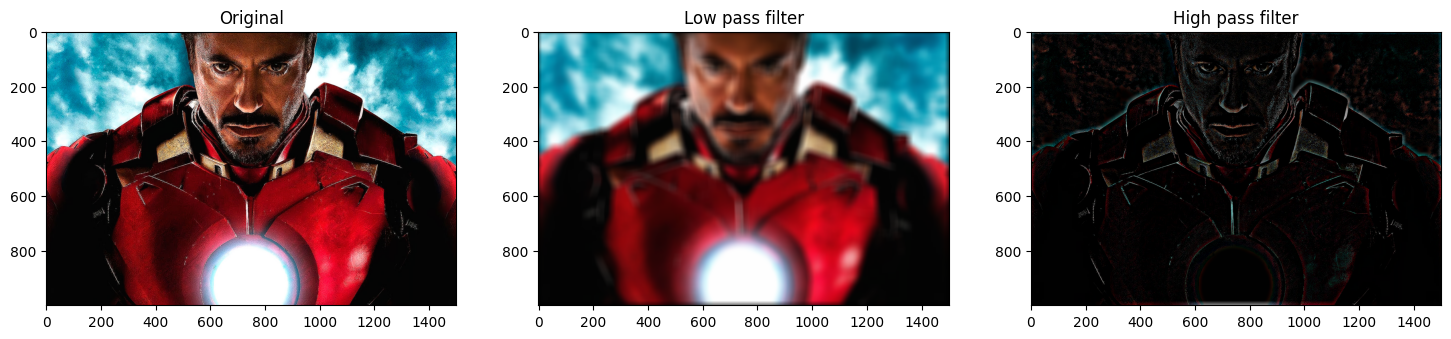

In [40]:
#your solution
ironman = io.imread('./images_notebook/Ironman.jpg')
mask_15=np.ones((30,30))
# Normalize the mask
mask_15=mask_15/np.sum(mask_15)

# get channels
red = ironman[: , : ,0]
green = ironman[: , : ,1]
blue = ironman[: , : ,2]

# apply convolution with normalized mask == Low pass filter
red_conv= convolve(red, mask_15, mode='constant', cval=0)
green_conv= convolve(green, mask_15, mode='constant', cval=0)
blue_conv= convolve(blue, mask_15, mode='constant', cval=0)

conv_ironman = np.zeros(ironman.shape).astype(int)  
conv_ironman[: , : ,0] = red_conv
conv_ironman[: , : ,1] = green_conv
conv_ironman[: , : ,2] = blue_conv

# H(I) = I - L(I)
# High Pass filter
edges_ironman = ironman - conv_ironman

fig=plt.figure(figsize=(18,9))
fig.add_subplot(1,3,1)
plt.imshow(ironman)
plt.title('Original')
fig.add_subplot(1,3,2)
plt.imshow(conv_ironman)
plt.title('Low pass filter')
fig.add_subplot(1,3,3)
plt.imshow(edges_ironman)
plt.title('High pass filter')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'High pass filter')

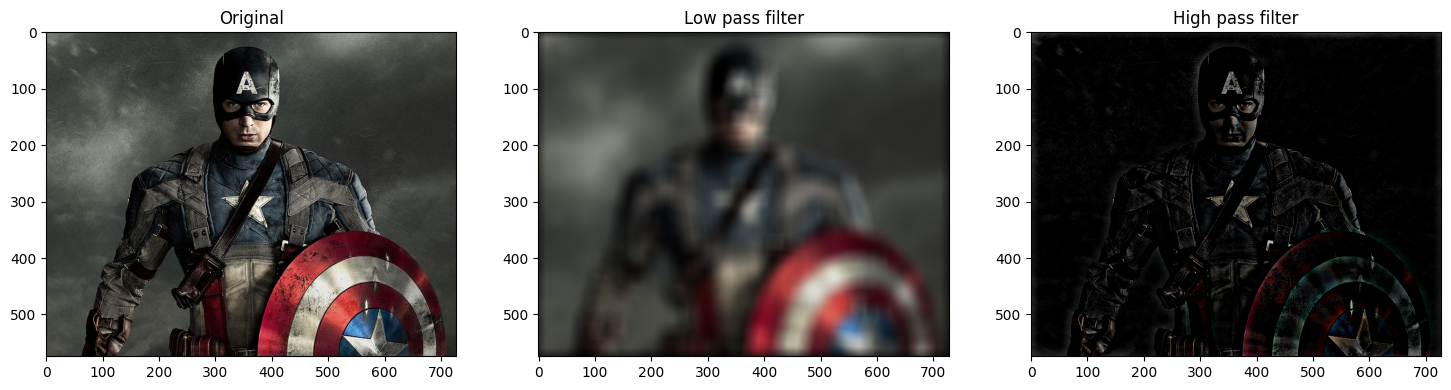

In [41]:
#your solution
capitain_america = io.imread('./images_notebook/Capitain_America.jpg')
warnings.filterwarnings("ignore")

red = capitain_america[: , : ,0]
green = capitain_america[: , : ,1]
blue = capitain_america[: , : ,2]

red_conv= convolve(red, mask_15, mode='constant', cval=0)
green_conv= convolve(green, mask_15, mode='constant', cval=0)
blue_conv= convolve(blue, mask_15, mode='constant', cval=0)

conv_capamerica=np.zeros(capitain_america.shape).astype(int)
    
conv_capamerica[: , : ,0] = red_conv
conv_capamerica[: , : ,1] = green_conv
conv_capamerica[: , : ,2] = blue_conv

edges_capamerica = capitain_america - conv_capamerica

fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,3,1)
plt.imshow(capitain_america)
plt.title('Original')
fig.add_subplot(1,3,2)
plt.imshow(conv_capamerica)
plt.title('Low pass filter')
fig.add_subplot(1,3,3)
plt.imshow(edges_capamerica)
plt.title('High pass filter')


b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="800">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Low pass filter')

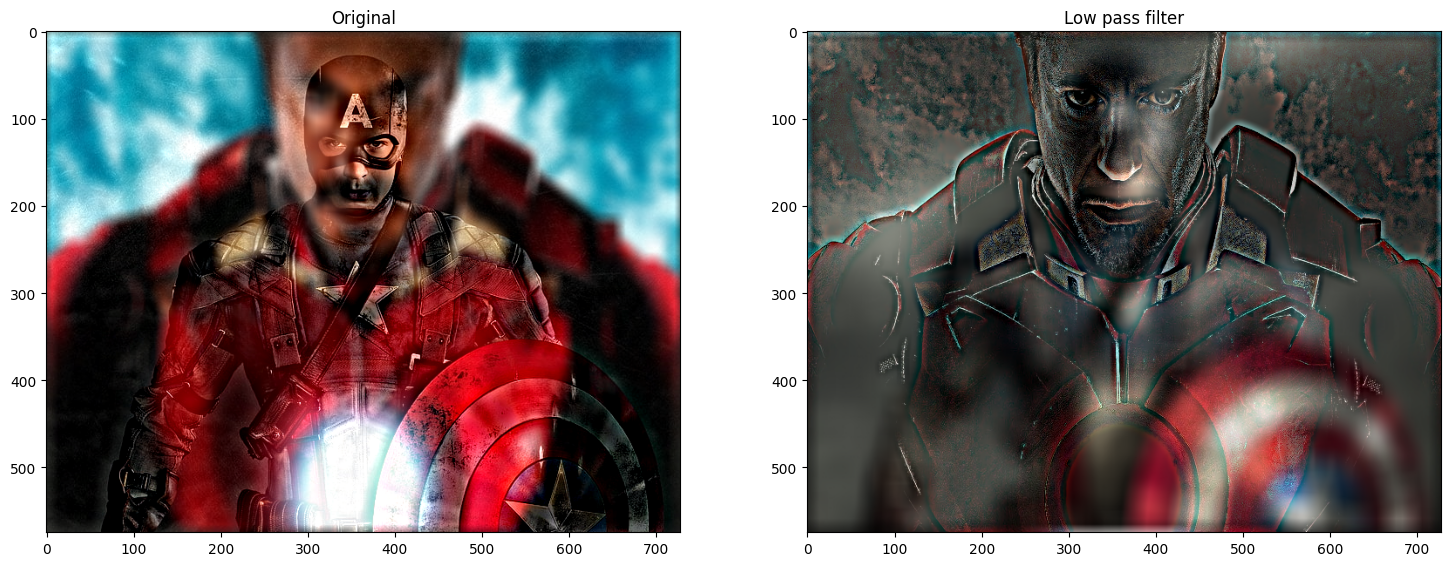

In [42]:
#your solution
conv_ir_ma_resized =(resize(conv_ironman/255,capitain_america.shape)*255).astype(np.uint8)
edges_ir_ma_resized =(resize(edges_ironman/255,capitain_america.shape)*255).astype(int)

mask_ca_am = edges_capamerica != 0 
ir_ma_plus_ca_am = conv_ir_ma_resized + edges_capamerica
ca_am_plus_ir_ma = conv_capamerica + edges_ir_ma_resized

fig=plt.figure(figsize=(18,9))

fig.add_subplot(1,2,1)
plt.imshow(ir_ma_plus_ca_am)
plt.title('Original')
fig.add_subplot(1,2,2)
plt.imshow(ca_am_plus_ir_ma)
plt.title('Low pass filter')

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

In [45]:


""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
%matplotlib nbagg
import matplotlib.animation as animation


ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=int((ic[0].shape[0])*scale)
width=int((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, multichannel=True)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

def updatefig1(i): 
    im.set_array(gaussian(ic_small[:,:,:,i], 10)) #showing the small image
    plt.draw()
    return i

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
plt.show()


Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>